In [1]:
from scipy.stats import norm, gmean
import numpy as np
import math
from numba import jit, prange
import matplotlib.pyplot as plt

# Структурные продукты с полной защитой капитала

## СП с использованием азиатских опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется рост акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона call.

In [2]:
def Geometric_Average_Rate_Call(S, K , T , r , b , sigma):
  sigmaA = sigma/np.sqrt(3)
  bA = (b - sigma**2/6)/2
  d1 = (np.log(S/K)+(bA + sigmaA**2/2)*T)/(sigmaA*np.sqrt(T))
  d2 = d1 - sigmaA * np.sqrt(T)
  return S * np.exp((bA - r)*T) * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)

S = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3

print ('Геометрическая среднее. Стоимость азиатского опциона колл =', Geometric_Average_Rate_Call(S , K , T , r , r-q , sigma))
# 7.906075677449117

Геометрическая среднее. Стоимость азиатского опциона колл = 7.906075677449117


## Задача

Задача. В услових примера вычислите коэффициент участия.

Ответ: PR = 85.5%

In [6]:
# ваш код
N = 1

asian_c = Geometric_Average_Rate_Call(S , K , T , r , r-q , sigma)
DA = np.exp(-r * T) * N

Q = (N - DA) / asian_c

Q * 1000

8.551167842585686

## Задача

Задача. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется падение акции. Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1 день. Постройте структурный продукт с полной гарантией возврата инвестированного капитала и азиатского опциона put.

Постройте графики выплат для опциона колл и пут. Сделайте выводы.

In [23]:
def Geometric_Average_Rate_Put(S, K , T , r , b , sigma):
  sigmaA = sigma/np.sqrt(3)
  bA = (b - sigma**2/6)/2
  d1 = (np.log(S/K)+(bA + sigmaA**2/2)*T)/(sigmaA*np.sqrt(T))
  d2 = d1 - sigmaA * np.sqrt(T)
  return K * np.exp(-r*T)*norm.cdf(-d2) - S * np.exp((bA - r)*T) * norm.cdf(-d1)

In [30]:
# ваш код
N = 10**5
T = 365
S = 100
r = .07 / T
q = 0
sigma = .3 / np.sqrt(T)

"""
Для того, чтобы гарантировать 100% возврат, 
средств нужно часть денег вложить в безрисковый актив - депозит
вложим туда 90% денег
"""

print(f'Убираем на депозит: {N * np.exp(-r * T):.2f}, что является {np.exp(-r * T) * 100:.2f} % от всей суммы')

c = Geometric_Average_Rate_Put(S , K , T , r , r-q , sigma)

risk_part = N - N * np.exp(-r * T)
print(f'на сумму {N - N * np.exp(-r * T):.2f} покупаем опцион')
PR = S * round(risk_part / c) / N

PR * 100


Убираем на депозит: 93239.38, что является 93.24 % от всей суммы
на сумму 6760.62 покупаем опцион


127.4

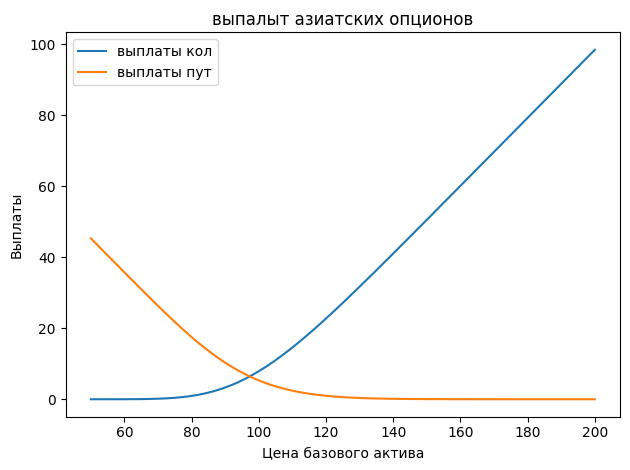

In [31]:
S_grid = np.linspace(S*.5, S*2, 100)

asian_c = Geometric_Average_Rate_Call(S_grid , K , T , r , r-q , sigma)
asian_p = Geometric_Average_Rate_Put(S_grid , K , T , r , r-q , sigma)


plt.plot(S_grid, asian_c, label='выплаты кол')
plt.plot(S_grid, asian_p, label='выплаты пут')

plt.title('выпалыт азиатских опционов')
plt.xlabel('Цена базового актива')
plt.ylabel('Выплаты')

plt.legend()
plt.tight_layout()
plt.show()

## Задача

Задача. Проведите исследование и сравните влияние периодичности наблюдения (1 день, 1 неделя, 1 месяц) на
*   стоимость азиатского опциона,
*   волатильность.

Сделайте выводы, подкрепите выводы иллюстративными графиками.

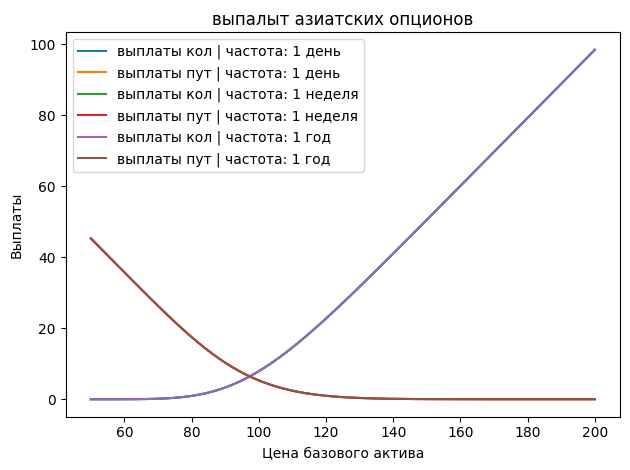

Волатильности: [0.01570271767770641, 0.041602514716892185, 0.3]


In [34]:
# ваш код
sigmas = []

N = 10**5
S = 100
q = 0

# частота 1 день

T = 365
r = .07 / T
sigma = .3 / np.sqrt(T)

sigmas.append(sigma)

S_grid = np.linspace(S*.5, S*2, 100)

asian_c = Geometric_Average_Rate_Call(S_grid , K , T , r , r-q , sigma)
asian_p = Geometric_Average_Rate_Put(S_grid , K , T , r , r-q , sigma)


plt.plot(S_grid, asian_c, label='выплаты кол | частота: 1 день')
plt.plot(S_grid, asian_p, label='выплаты пут | частота: 1 день')


T =  52
r = .07 / T
sigma = .3 / np.sqrt(T)

sigmas.append(sigma)

S_grid = np.linspace(S*.5, S*2, 100)

asian_c = Geometric_Average_Rate_Call(S_grid , K , T , r , r-q , sigma)
asian_p = Geometric_Average_Rate_Put(S_grid , K , T , r , r-q , sigma)


plt.plot(S_grid, asian_c, label='выплаты кол | частота: 1 неделя')
plt.plot(S_grid, asian_p, label='выплаты пут | частота: 1 неделя')


T = 1
r = .07 / T
sigma = .3 / np.sqrt(T)

sigmas.append(sigma)

S_grid = np.linspace(S*.5, S*2, 100)

asian_c = Geometric_Average_Rate_Call(S_grid , K , T , r , r-q , sigma)
asian_p = Geometric_Average_Rate_Put(S_grid , K , T , r , r-q , sigma)


plt.plot(S_grid, asian_c, label='выплаты кол | частота: 1 год')
plt.plot(S_grid, asian_p, label='выплаты пут | частота: 1 год')

plt.title('выпалыт азиатских опционов')
plt.xlabel('Цена базового актива')
plt.ylabel('Выплаты')

plt.legend()
plt.tight_layout()
plt.show()


print(f'Волатильности: {sigmas}')

чем чаще смотрим, тем меньше лок волатильность, но в целом выплати не отличаются

Пример 2. Оцените стоимость азиатского опциона колл с использованием метода Монте-Карло. При условиях цена базового актива и страйк 100, дата экспирации через 1 год, безрисковая ставка 7%, волатильность 30%. Переодичность наблюдений - 1 день, количество траекторий 1000.

In [35]:
# Box-Muller transform to generate normal deviates
def getGaussian(mu, sigma, n):

	# Generate a pair of uniform random variables U,V
  U = np.random.uniform(0, 1, n)
  V = np.random.uniform(0, 1, n)

  # Get R~Exponential(1) and Theta~Uniform(0, 2pi) random variables
  R     = -np.log(U)
  Theta = 2*np.pi*V

	# Transform to X and Y
  X = np.multiply(np.sqrt(2*R), np.cos(Theta))
  Y = np.multiply(np.sqrt(2*R), np.sin(Theta))

  # Perform location-scale transform
  X = mu + sigma*X
  Y = mu + sigma*Y
  return X, Y

In [36]:
def gbm_mcs(mu, sigma, S0, T, n, noOfPaths):
  S = []
  delta_t = T/n
  # Mean and variance of a lognormal random walk
  mean = S0 * np.exp((mu+(0.5*sigma**2))*T)
  variance = (S0 ** 2)*np.exp(2*mu*T + 2*(sigma ** 2)*T)*(np.exp(sigma**2)*T-1)
  for i in range(noOfPaths):
    X, Y = getGaussian(0, 1, n)
    dz_t = X
    dW_t = np.sqrt(delta_t) * dz_t
    dX_t = mu * delta_t + sigma * dW_t
    X_t = np.cumsum(dX_t)
    S_t = S0 * np.exp(X_t)
    S.append(S_t)
  S = np.array(S)
  return S, mean, variance

In [37]:
S0    = 100

noOfPaths = 1000
T = 1
n = 250

K = 100
r = 0.07

sigma = 0.3
mu = r - (0.5*sigma**2)

In [38]:
# Simulate a lognormal random walk
S, mean, variance = gbm_mcs(mu, sigma, S0, T, n, noOfPaths)
c = 0.0
for i in range(noOfPaths):
  c = c + max(np.mean(S[i]) - K, 0)
disc = np.exp(-r*T)
#c = disc * (c/noOfPaths)
print ('Монте-Карло моделирование. Стоимость азиатского опциона колл =', disc * (c/noOfPaths))
#print(c)

Монте-Карло моделирование. Стоимость азиатского опциона колл = 7.941088060995411


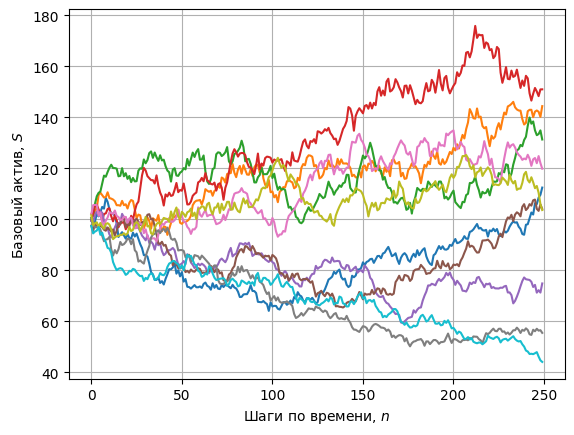

In [39]:
import matplotlib.pyplot as plt

time = list(range(n))
for i in range(10):
  plt.plot(time, S[i])

plt.xlabel('Шаги по времени, $n$')
plt.ylabel('Базовый актив, $S$')
plt.grid(True)
plt.show()

## Задача

Задача. Переписать цикл for и избавиться от использования констант (использовать переменную step).

/var/folders/xx/x_6wt9hs2vq2twldfgptb5840000gn/T/ipykernel_67378/3741973409.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


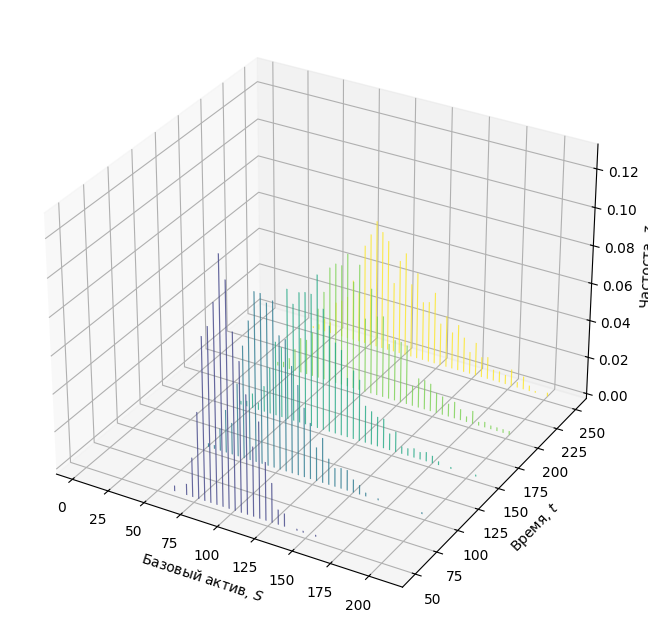

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap

sd = np.sqrt(variance)
step = 50

# Density plot of the underlying price
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111,projection='3d')
x   = np.linspace(mean-3*sd, mean+3*sd, step+1)

cmap = get_cmap('viridis')
steps = np.arange(0, n, step) + step
colors = [cmap(i / n) for i in steps]

for i,c in zip(steps,colors):
  hist, bins = np.histogram(S[:,i-1], bins = x)
  hist = hist/noOfPaths
  cs = [c] * step
  ax.bar(x[:-1],hist, i, zdir = 'y', color=cs, alpha=0.8)

ax.set_xlabel('Базовый актив, $S$')
ax.set_ylabel('Время, $t$')
ax.set_zlabel('Частоста, $z$')

plt.show()

## Задача

Задача. Проверить гипотезу о том, что на разных временных шагах гистограммы принадлежат одному распределению.

просто воспользуемся критерием Колмогорова-Смирнова

In [55]:
# ваш код
from scipy.stats import ks_2samp

results_ks = []

for i in range(len(steps)):
    for j in range(i+1, len(steps)):
        t1, t2 = steps[i], steps[j]
        statistic, pvalue = ks_2samp(S[:,t1-1], S[:,t2-1])
        results_ks.append((t1, t2, statistic, pvalue))

print("Результаты теста Колмогорова-Смирнова:")
for res in results_ks:
    t1, t2, ks_stat, ks_pvalue = res
    print(f"Временные шаги {t1} и {t2}: KS-stat = {ks_stat:.4f}, p-value = {ks_pvalue:.4f}")
        

Результаты теста Колмогорова-Смирнова:
Временные шаги 50 и 100: KS-stat = 0.0840, p-value = 0.0017
Временные шаги 50 и 150: KS-stat = 0.1300, p-value = 0.0000
Временные шаги 50 и 200: KS-stat = 0.1610, p-value = 0.0000
Временные шаги 50 и 250: KS-stat = 0.1880, p-value = 0.0000
Временные шаги 100 и 150: KS-stat = 0.0610, p-value = 0.0484
Временные шаги 100 и 200: KS-stat = 0.0990, p-value = 0.0001
Временные шаги 100 и 250: KS-stat = 0.1270, p-value = 0.0000
Временные шаги 150 и 200: KS-stat = 0.0490, p-value = 0.1812
Временные шаги 150 и 250: KS-stat = 0.0770, p-value = 0.0053
Временные шаги 200 и 250: KS-stat = 0.0410, p-value = 0.3701


Пример.
В условиях примера 1

1. Вычислите  результаты от инвестирования используя
формулу выплаты:
$$
r_{SP} =
\max\left( r_{SP \min}, r_{SP \min} + PR \times \frac{P_{avg} - S}{S}\right),
$$
здесь $\frac{P_{avg} - S}{S}$ -- доходность базового актива относительно среднего значения $P_{avg}$, $S$ -- цена начала участия, или страйк встроенных опционов (в
простейшем случае он равен цене спот базового актива на момент выпуска продукта, т.е. $P_0$).

2. Постройте продукт со встроенным азиатским опционом, оцененным методом Монте-Карло. Для уменьшения разброса в качестве control variate использовать геометрическое усреднение. Вычислите доверительный интервал.

3. Сравните полученные результаты с результатами предыдущих задач и подкрепите выводы иллюстративными графиками.

In [56]:
def bs_call_exact(t, s0, k, r, sigma):
    dp = 1 / ( sigma * math.sqrt( t ) ) * ( math.log( s0 / k ) + ( r + sigma**2 / 2) * ( t ) )
    dm = dp - sigma * math.sqrt( t )
    return s0 * norm.cdf(dp) - k * math.exp( - r * t ) * norm.cdf(dm)

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

@jit(nopython=True, inline = 'always')
def wiener(t):
    return math.sqrt( t ) * np.random.normal(0, 1)

@jit(nopython=True, inline = 'always')
def st(t, s0, r, sigma):
    return s0 * math.exp( ( r - sigma**2 / 2) * t + sigma * wiener( t ) )

@jit(parallel=True, nopython=False)
def asian_bs_call_mc_geom(n_iters, T, t_steps, S0, K, r, sigma):
    payoff = np.zeros(n_iters)
    avg_S = np.zeros(n_iters)
    m = len(t_steps)
    for i in prange(0, n_iters):
        geom_avg_s = 0
        S0_j = S0
        for j in range(1, m):
            S_j = st( (t_steps[j] - t_steps[j-1] ) * T, S0_j, r, sigma)
            S0_j = S_j
            geom_avg_s += math.log(S_j)
        geom_avg_s = math.exp(geom_avg_s / ( m - 1))
        avg_S[i] = geom_avg_s
        payoff[i] = math.exp(-r * T) * max(geom_avg_s - K , 0)
    return payoff, avg_S

In [57]:
N_MC = int(10**5)
T, S0, K, r, sigma = 1, 100, 100, 0.07, 0.3
m = 1000
t_steps = np.array([i/m for i in range(0, m + 1)])
payoff_data, S_data = asian_bs_call_mc_geom(N_MC, T, t_steps, S0, K, r, sigma)
asian_call = np.mean(payoff_data)
print(f"asian call = {asian_call:.4f} +- {1.96 / math.sqrt(n) * np.std(payoff_data):.4f} with 95% prob")

asian call = 7.9046 +- 1.4387 with 95% prob


In [58]:
N = 100000

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / asian_call
PR_1 = K * Q_1/ N
S_1 = np.sort(S_data)
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_1 - S0) / S0 )

print(f"asian call r_sp_mean = {np.mean(r_sp_1)}, PR = {PR_1}")

asian call r_sp_mean = 0.07250818125421635, PR = 0.8552731057637281


In [59]:
european_call = bs_call_exact(T, S0, K, r, sigma)
Q_2 = (N - da) / european_call
PR_2 = K * Q_2/ N
S_2 = np.sort(np.array([st(T, S0, r, sigma) for i in range(0, N_MC)]))
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_2 - S0) / S0 )

print(f"european call r_sp_mean = {np.mean(r_sp_2)}, PR = {PR_2}")

european call r_sp_mean = 0.07268473899236354, PR = 0.44447044652333806


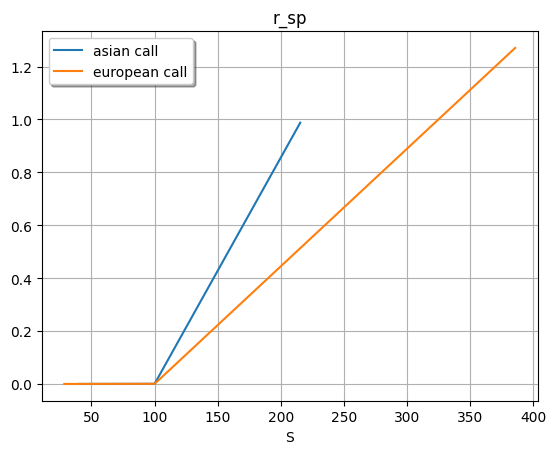

In [60]:
plt.plot(S_1, r_sp_1, label = 'asian call')
plt.plot(S_2, r_sp_2, label = 'european call')

plt.title('r_sp')
plt.xlabel('S')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

In [61]:
S0 = 100
K = 100
T = 1
r = 0.07
q = 0.0
sigma = 0.3
call_price = Geometric_Average_Rate_Call(S0, K , T , r , r-q , sigma)
print ('Geometric average rate call =', call_price)

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Participation rate = ', PR)

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S.mean(axis=1).mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Geometric average rate call = 7.906075677449117
Participation rate =  0.855
Rsp averaged over 1000 samples = 2.18%


In [62]:
# task 2 evaluate asian option price using MC method
import scipy.stats

print('Наблючений:', S.shape)
# geometric averaging
S_means = np.prod(S**(1/S.shape[1]), axis=1)
payoffs = np.exp(-r * T) * np.maximum(S_means - K, 0)
avg_payoff = np.mean(payoffs)
std_error = np.sqrt(np.sum((payoffs - avg_payoff)**2) / (payoffs.shape[0] - 1))
print('Среднее значание функции выплат = ', round(avg_payoff,3))
print('Стандартная ошибка = ', round(std_error, 3))
scaler = scipy.stats.t.ppf((1 + 0.95) / 2., payoffs.shape[0] - 1)
print(f'Доверительный интервал : [{avg_payoff - std_error * scaler:.3f}(0):{avg_payoff + std_error * scaler:.3f}]')

Наблючений: (1000, 250)
Среднее значание функции выплат =  7.483
Стандартная ошибка =  11.653
Доверительный интервал : [-15.384(0):30.349]


In [63]:
# task 3 compare results

print('Analytical Geometric average rate call =', round(call_price, 3))
print('Relative error for MC method = ', round(abs(call_price - avg_payoff) / call_price * 100, 3), '%\n')

# profit compare with vanilla call
def call(S, K, tau, vol, r, q):
    d1 = (np.log (S / K) + (r + vol**2 / 2) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - vol * np.sqrt(tau)
    return S * np.exp(-q * tau) * norm.cdf(d1) - K * np.exp (-r * tau) * norm.cdf(d2)

call_price = call(S0, K , T , sigma , r, q)
print ('Стоимость опциона колл =', round(call_price, 3))

cash =100_000
risk_part = cash - cash * np.exp(-r * T)
PR = S0 * round(risk_part / call_price) / cash
print('Коэффициент участия = ', PR * 100, '%')

# task calc Rsp
rsp_min = 1 - 1 # full return guarantee (100%) minus 100%
rsp = np.maximum(rsp_min, rsp_min + PR * (S[:, -1].mean() - S0)/S0)
print('Rsp averaged over 1000 samples = {}%'.format(round(rsp*100,2)))

Analytical Geometric average rate call = 7.906
Relative error for MC method =  5.357 %

Стоимость опциона колл = 15.211
Коэффициент участия =  44.4 %
Rsp averaged over 1000 samples = 2.41%


Text(0.5, 0, 'Price S_T')

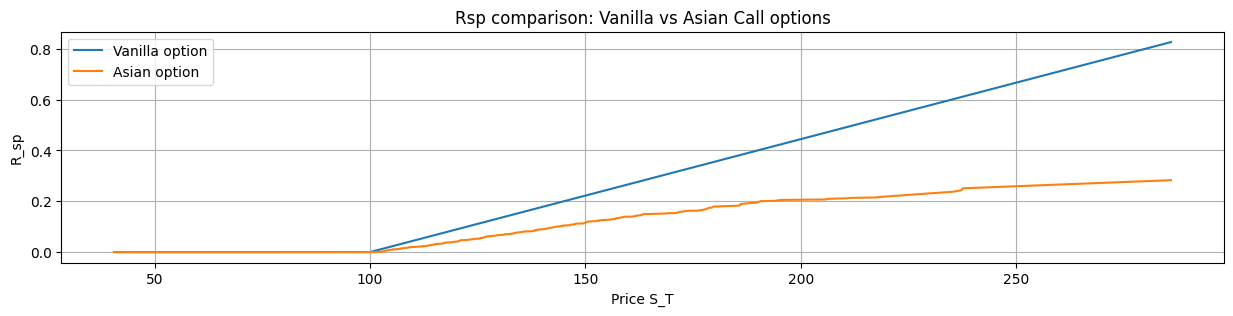

In [64]:
# profit plots
plt.figure(figsize=(15,3))
plt.title('Rsp comparison: Vanilla vs Asian Call options')
rsps = np.maximum(rsp_min, rsp_min + PR * (S[:, -1] - S0)/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps), label='Vanilla option')
rsps2 = np.maximum(rsp_min, rsp_min + PR * payoffs/S0)
plt.plot(sorted(S[:, -1]), sorted(rsps2), label='Asian option')
plt.legend();plt.grid()
plt.ylabel('R_sp')
plt.xlabel('Price S_T')
# according to that payoff for an asian option is dependent on average asset price during the history
# the profit for this product is growth much slower than the one for vanilla option
# but
# it's not necessary has profit starting from price = S0 as below since we plotted only last price
# not average one, so actually it's possible to have positive pnl starting from price much lower

# Задача

Сравните различные методы оценивания (арифметический и Монте-Карло) азиатского опциона для бездивидентных акций:
$S_0= 116,79$, $К= 117$, срок погашения составляет 3 месяца. Волатильность акций составляет 0,02803, а безрисковый процент составляет 0,624% с непрерывным начислением процентов.


https://github.com/olof98johansson/FinancialOptionsModelling

https://webthesis.biblio.polito.it/20278/1/tesi.pdf

In [93]:
# ваш код
S0 = 116.79 
K = 117 
T = 90
sigma = 0.02803
r = 0.00624
N = 10000 
M = 50

In [94]:
# Генерация траекторий базового актива
dt = T / M
np.random.seed(42)
Z = np.random.normal(0, 1, (N, M))  # случайные числа
S = np.zeros((N, M + 1))
S[:, 0] = S0

for t in range(1, M + 1):
    S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t - 1])

# Расчет средней цены
S_avg = S.mean(axis=1)

# Выплаты опциона (Call и Put)
payoff_call = np.maximum(S_avg - K, 0)
payoff_put = np.maximum(K - S_avg, 0)

# Дисконтированные стоимости
price_call_mc = np.exp(-r * T) * payoff_call.mean()
price_put_mc = np.exp(-r * T) * payoff_put.mean()

print(f"Монте-Карло: Цена Call опциона = {price_call_mc:.4f}")
print(f"Монте-Карло: Цена Put опциона = {price_put_mc:.4f}")

Монте-Карло: Цена Call опциона = 22.8604
Монте-Карло: Цена Put опциона = 0.1802


In [95]:
vol_eff = sigma / np.sqrt(3)
S_avg_geom = S0 * np.exp(-0.5 * sigma**2 * T / 2)
d1 = (np.log(S_avg_geom / K) + (r + 0.5 * vol_eff**2) * T) / (vol_eff * np.sqrt(T))
d2 = d1 - vol_eff * np.sqrt(T)

price_call_analytic = S_avg_geom * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
price_put_analytic = K * np.exp(-r * T) * norm.cdf(-d2) - S_avg_geom * norm.cdf(-d1)

print(f"Аналитический метод: Цена Call опциона = {np.exp(-r * T) * price_call_analytic:.4f}")
print(f"Аналитический метод: Цена Put опциона = {np.exp(-r * T) * price_put_analytic:.4f}")

Аналитический метод: Цена Call опциона = 27.3854
Аналитический метод: Цена Put опциона = 0.0004


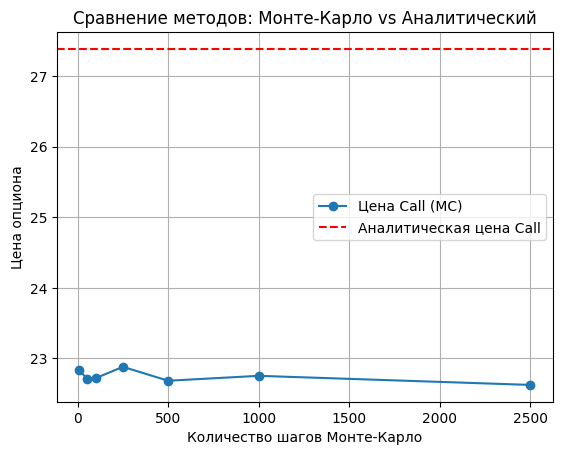

In [96]:
n_steps = [10, 50, 100, 250, 500, 1000, 2500]
mc_prices = []

for steps in n_steps:
    dt = T / steps
    S = np.zeros((N, steps + 1))
    S[:, 0] = S0
    Z = np.random.normal(0, 1, (N, steps))

    for t in range(1, steps + 1):
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t - 1])

    S_avg = S.mean(axis=1)
    payoff_call = np.maximum(S_avg - K, 0)
    mc_prices.append(np.exp(-r * T) * payoff_call.mean())

plt.plot(n_steps, mc_prices, marker='o', label="Цена Call (MC)")
plt.axhline(y=np.exp(-r * T) * price_call_analytic, color='r', linestyle='--', label="Аналитическая цена Call")
plt.xlabel("Количество шагов Монте-Карло")
plt.ylabel("Цена опциона")
plt.legend()
plt.title("Сравнение методов: Монте-Карло vs Аналитический")
plt.grid(True)
plt.show()

# Структурные продукты без гарантии возврата капитала

## Задача.

Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Ожидается рост цен на акции «A».  Клиент готов нести 30\% потери в случае падении цены акции <<А>> (меньше чем при прямой покупке акции) в обмен на увеличение коэффициента участия. Текущая цена акции 100 руб.

Входные параметры продукта:
*   базовый актив -- акции,
*   срок -- $T = 1$ год,
*   цена начала участия -- $P_0 = 100$рублей,
*   барьерная цена (тип барьера) -- «включаемый» (knock-in) и «выключаемый» (knock-out),
*   условия наблюдения с целью определения пробития барьера -- частота
наблюдений, длина периода наблюдений, расположение периода наблюдений
в случае, если оно частичное – в начале, середине, конце срока продукта;
*   сценарий поведения базового актива -- рост.

Выходной параметр продукта:
*   коэффициент участия.


Проведите расчеты и вычислите коэффициент участия.

In [97]:
N = 10**5
S0 = 100
K = 100 
T = 1
sigma = 0.3
r = 0.07
risk_limit = 0.3

In [107]:
def barrier_option_price(S, K, T, sigma, r, H, is_knock_in=True):
    barrier_hit = S < H
    if (is_knock_in and not barrier_hit) or (not is_knock_in and barrier_hit):
        return call(S, K, T, sigma, r, .0)
    return  0

In [108]:
guaranteed_capital = (1 - risk_limit) * N
discounted_capital = guaranteed_capital * np.exp(-r * T)

# Доступный капитал для опционов
available_capital = N - discounted_capital

H_knock_in = S0 * .9  # S, K, tau, vol, r, q
H_knock_out = S0 * 1.2

# Стоимость барьерных опционов
knock_in_price = barrier_option_price(S0, K, T, sigma, r, H_knock_in, is_knock_in=True)
knock_out_price = barrier_option_price(S0, K, T, sigma, r, H_knock_out, is_knock_in=False)

# Коэффициент участия
alpha = available_capital / (knock_in_price + knock_out_price)

print(f"Коэффициент участия: {alpha:.2f}")


Коэффициент участия: 1141.73


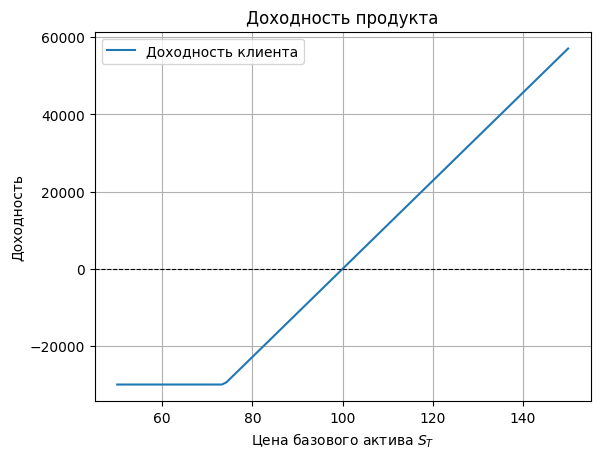

In [109]:
S_T = np.linspace(50, 150, 100)

# Доходность для клиента
payoff = np.maximum(alpha * (S_T - S0), -risk_limit * N)

# Построение графика
plt.plot(S_T, payoff, label='Доходность клиента')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('Цена базового актива $S_T$')
plt.ylabel('Доходность')
plt.title('Доходность продукта')
plt.legend()
plt.grid(True)
plt.show()